In [1]:
# We import libraries needed for data analysis and visualization

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


In [4]:
# We load stock history for analysis and stock info for company details

In [5]:
stock_history = pd.read_csv("/content/Coca-Cola_stock_history.csv")
stock_info = pd.read_csv("/content/Coca-Cola_stock_info.csv")


In [6]:
# We check the first few rows to understand columns and data format

In [7]:
stock_history.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1962-01-02,0.050016,0.051378,0.050016,0.050016,806400,0.0,0
1,1962-01-03,0.049273,0.049273,0.048159,0.048902,1574400,0.0,0
2,1962-01-04,0.049026,0.049645,0.049026,0.049273,844800,0.0,0
3,1962-01-05,0.049273,0.049892,0.048035,0.048159,1420800,0.0,0
4,1962-01-08,0.047787,0.047787,0.046735,0.047664,2035200,0.0,0


In [8]:
# his dataset gives company background and business context

In [9]:
stock_info


,Key,Value
0,zip,30313
1,sector,Consumer Defensive
2,fullTimeEmployees,80300
3,longBusinessSummary,"The Coca-Cola Company, a beverage company, man..."
4,city,Atlanta
...,...,...
148,dayHigh,60.345
149,regularMarketPrice,59.6
150,preMarketPrice,NaN
151,logo_url,https://logo.clearbit.com/coca-colacompany.com


In [10]:
# We check dataset size, data types, and basic statistics

In [11]:
stock_history.shape


(15311, 8)

In [12]:
stock_history.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15311 entries, 0 to 15310
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          15311 non-null  object 
 1   Open          15311 non-null  float64
 2   High          15311 non-null  float64
 3   Low           15311 non-null  float64
 4   Close         15311 non-null  float64
 5   Volume        15311 non-null  int64  
 6   Dividends     15311 non-null  float64
 7   Stock Splits  15311 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 957.1+ KB


In [13]:
stock_history.describe()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,15311.000000,15311.000000,15311.000000,15311.000000,1.531100e+04,15311.000000,15311.000000
mean,11.812883,11.906708,11.717375,11.815409,9.139213e+06,0.001678,0.001110
std,15.025726,15.133336,14.915580,15.026316,7.957947e+06,0.021302,0.049148
min,0.037154,0.037279,0.034890,0.037028,7.680000e+04,0.000000,0.000000
25%,0.238453,0.240305,0.236415,0.238312,2.889600e+06,0.000000,0.000000
50%,4.935146,4.980985,4.884242,4.937339,7.708800e+06,0.000000,0.000000
75%,17.383926,17.612844,17.168283,17.415106,1.307130e+07,0.000000,0.000000
max,66.037933,66.235058,64.776308,65.259270,1.241690e+08,0.440000,3.000000


In [14]:
# Convert Date column to datetime

In [15]:
stock_history["Date"] = pd.to_datetime(stock_history["Date"])
stock_history.set_index("Date", inplace=True)


ValueError: unconverted data remains when parsing with format "%Y-%m-%d": " 00:00:00-04:00", at position 82. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [16]:
stock_history["Date"] = pd.to_datetime(stock_history["Date"], utc=True)


ValueError: unconverted data remains when parsing with format "%Y-%m-%d": " 00:00:00-04:00", at position 82. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [17]:
stock_history["Date"] = stock_history["Date"].dt.tz_localize(None)


AttributeError: Can only use .dt accessor with datetimelike values

In [18]:
stock_history.set_index("Date", inplace=True)


In [19]:
stock_history.index


Index(['1962-01-02', '1962-01-03', '1962-01-04', '1962-01-05', '1962-01-08',
       '1962-01-09', '1962-01-10', '1962-01-11', '1962-01-12', '1962-01-15',
       ...
       '2022-10-13 00:00:00-04:00', '2022-10-14 00:00:00-04:00',
       '2022-10-17 00:00:00-04:00', '2022-10-18 00:00:00-04:00',
       '2022-10-19 00:00:00-04:00', '2022-10-20 00:00:00-04:00',
       '2022-10-21 00:00:00-04:00', '2022-10-24 00:00:00-04:00',
       '2022-10-25 00:00:00-04:00', '2022-10-26 00:00:00-04:00'],
      dtype='object', name='Date', length=15311)

In [21]:
# We identify missing values before analysis


In [22]:
stock_history.isnull().sum()


,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock Splits,0


In [23]:
stock_history.fillna(method="ffill", inplace=True)


/tmp/ipython-input-4061740675.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_history.fillna(method="ffill", inplace=True)


In [24]:
# This graph shows how the stock closing price changes over time

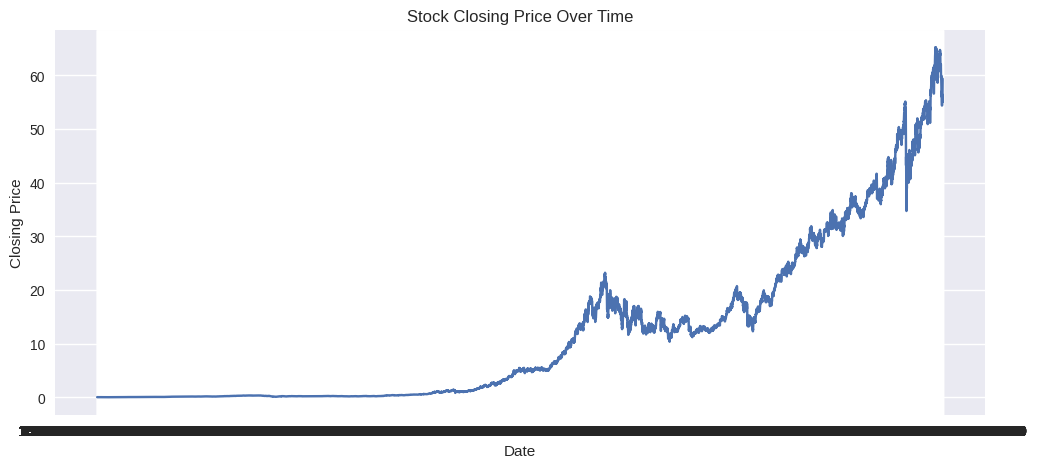

In [25]:
plt.figure(figsize=(12,5))
plt.plot(stock_history["Close"])
plt.title("Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()


In [26]:
# This graph shows market activity and investor interest

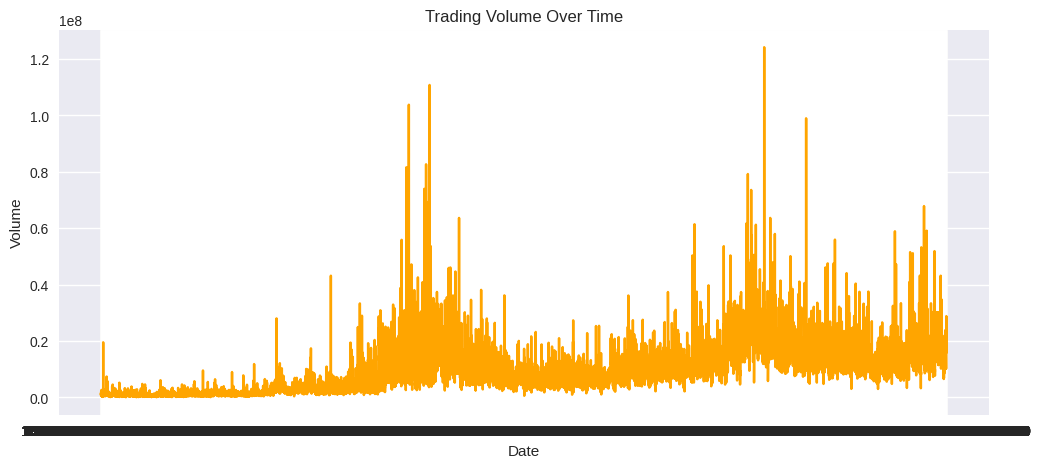

In [27]:
plt.figure(figsize=(12,5))
plt.plot(stock_history["Volume"], color="orange")
plt.title("Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()


In [28]:
# Moving averages help smooth price fluctuations and identify trends

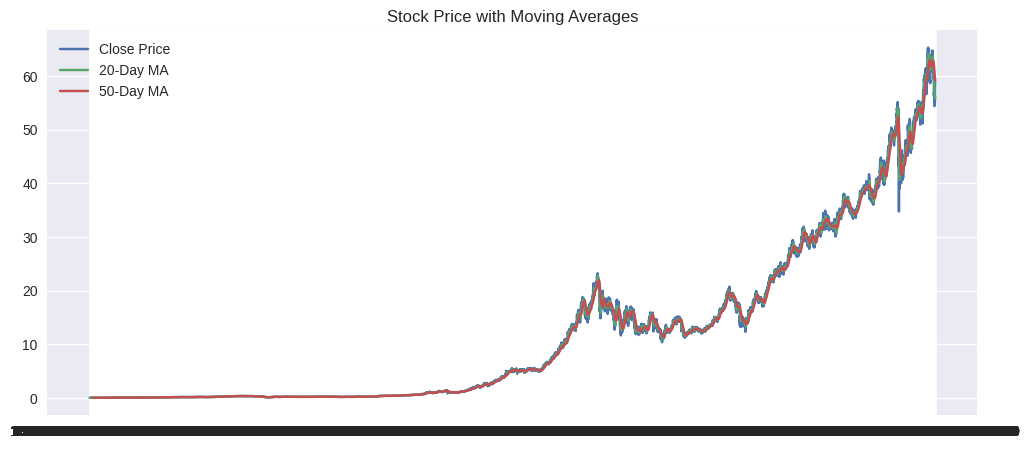

In [29]:
stock_history["MA20"] = stock_history["Close"].rolling(20).mean()
stock_history["MA50"] = stock_history["Close"].rolling(50).mean()

plt.figure(figsize=(12,5))
plt.plot(stock_history["Close"], label="Close Price")
plt.plot(stock_history["MA20"], label="20-Day MA")
plt.plot(stock_history["MA50"], label="50-Day MA")
plt.legend()
plt.title("Stock Price with Moving Averages")
plt.show()


In [30]:
# We calculate daily returns to understand volatility

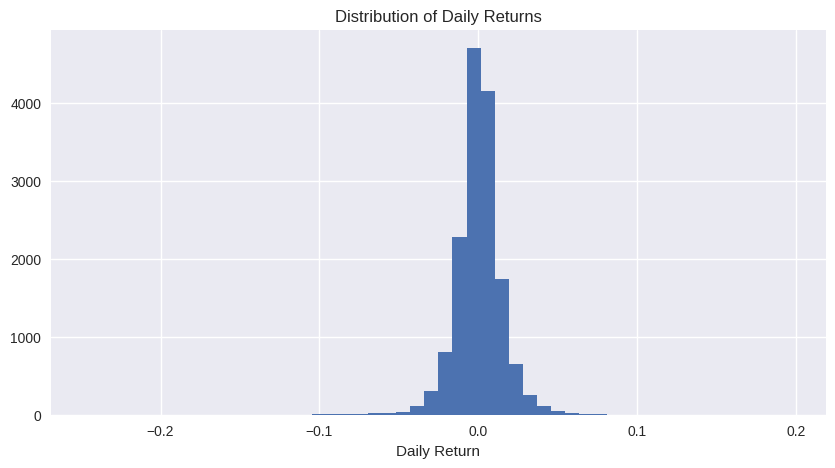

In [31]:
stock_history["Daily Return"] = stock_history["Close"].pct_change()

plt.figure(figsize=(10,5))
stock_history["Daily Return"].hist(bins=50)
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.show()


In [32]:
# We check correlation between price-related features

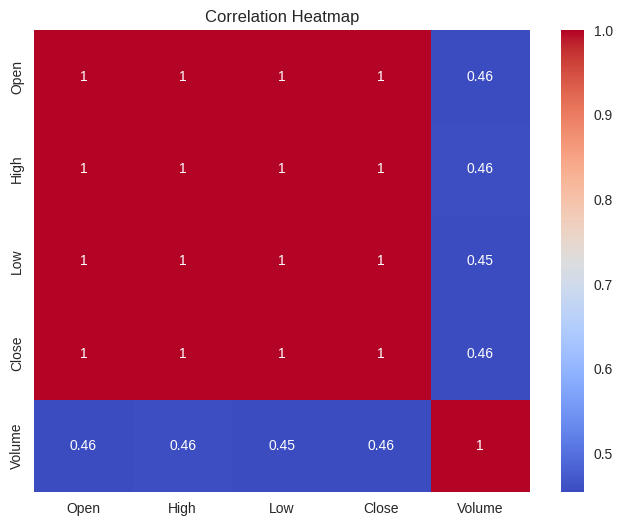

In [33]:
plt.figure(figsize=(8,6))
sns.heatmap(
    stock_history[["Open","High","Low","Close","Volume"]].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Heatmap")
plt.show()


In [35]:
### Key Insights
# The stock shows a long-term trend with short-term fluctuations.
# Moving averages help identify price direction and trend changes.
# Volume spikes indicate periods of high trading activity.
# Strong correlation exists between Open, High, Low, and Close prices.
